In [0]:
%pip install -r requirements.txt

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.6) to /tmp/pip-install-aplxdzxu/detectron2_789b3cbc95854d5fb30b9fdadedaf8cf
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-aplxdzxu/detectron2_789b3cbc95854d5fb30b9fdadedaf8cf
  Running command git checkout -q d1e04565d3bec8719335b88be9e9b961bf3ec464
  Resolved https://github.com/facebookresearch/detectron2.git to commit d1e04565d3bec8719335b88be9e9b961bf3ec464
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.8/548.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): star

In [0]:
from langchain.document_loaders import YoutubeLoader
import itertools
from langchain.text_splitter import RecursiveCharacterTextSplitter
import scrapetube
from types import SimpleNamespace

In [0]:
# loader = YoutubeLoader.from_youtube_url("https://youtube.com/watch?v=SfNglvSeOoA", add_video_info=True)
# loader.load()

Check to see if our helper package works as planned

In [0]:
vlinks = scrapetube.get_channel(channel_url="https://www.youtube.com/@Databricks")

In [0]:
from datetime import datetime, timedelta

# Define a dictionary that maps relative time strings to timedelta objects
time_map = {
    'yesterday': timedelta(days=1),
    'today': timedelta(days=0),
    'tomorrow': timedelta(days=1),
    'day': timedelta(days=1),
    'days': timedelta(days=1),
    'week': timedelta(weeks=1),
    'weeks': timedelta(weeks=1),
    'month': timedelta(days=30),
    'months': timedelta(days=30),
    'year': timedelta(days=365),
    'years': timedelta(days=365)
}

# Define a simple function to convert a relative time string to date
def get_date_from_relative_time(relative_time:str) -> str:
    # Split the relative time string into its components
    components = relative_time.split()

    # Get the number of units and the unit of time from the relative time string
    num_units = int(components[0])
    time_unit = components[1]

    # Convert the relative time to a timedelta object
    if time_unit in time_map:
        delta = time_map[time_unit] * num_units
    else:
        raise ValueError("Invalid time unit")

    # Calculate the date by subtracting the timedelta from the current date
    date = datetime.now() - delta

    # Return the date in a formatted string
    return date.strftime('%Y-%m-%d')

In [0]:
# Get all the links to the videos on the channel if the video was uploaded in the last 3yrs
hyperlinks2video = ['www.youtube.com'+video['navigationEndpoint']['commandMetadata']['webCommandMetadata']['url'] for video in vlinks if
datetime.strptime(get_date_from_relative_time(video['publishedTimeText']['simpleText']), '%Y-%m-%d') > datetime.now() - timedelta(365*3)]

In [0]:
# If we need to write the links collected to disk:
with open('links2videos.txt', 'w') as f:
    for link in hyperlinks2video:
        f.write("%s\n" % link)

In [0]:
# read from disk
with open("links2videos.txt", "r") as f:
    links = f.readlines()

# Strip whitespace and newline characters from each link
hyperlinks2video = [link.strip() for link in links]

In [0]:
import pytube
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import YoutubeLoader
splitter = RecursiveCharacterTextSplitter(chunk_size=3000,length_function=len)

In [0]:
def _fetch_and_produce_docs(link):
  "func takes a link and spits n transcripted docs based on splitter"
  print(f"INFO: Processing {list(locals().values())[0]}")
  doc = YoutubeLoader.from_youtube_url(link, add_video_info=True).load_and_split(splitter)
  docs.append(doc)

def retry_function(func, num_retries, sleep_time):
  "func applies retries and sleeps for a little while before trying again"
    for i in range(num_retries):
        try:
            func()
            return  
        except:
            print(f"Retry failed {i+1} time(s). Retrying in {sleep_time} seconds...")
            time.sleep(sleep_time) 
    raise ValueError(f"All {num_retries} retries failed")

In [0]:
import time
docs=[]
reprocess_url_list=[]
splitter = RecursiveCharacterTextSplitter(chunk_size=3000,length_function=len)
for link in hyperlinks2video:
  try:
    retry_function(lambda:_fetch_and_produce_docs(link),3,5)
  except Exception as e:
    print(e)
    reprocess_url_list.append(link)
    print(f"INFO: failed for link -  {link}")

INFO: Processing dict_values(['www.youtube.com/watch?v=2F6mBvLoavs'])
INFO: Processing dict_values(['www.youtube.com/watch?v=xAav6GslSd8'])
Retry failed 1 time(s). Retrying in 5 seconds...
INFO: Processing dict_values(['www.youtube.com/watch?v=xAav6GslSd8'])
Retry failed 2 time(s). Retrying in 5 seconds...
INFO: Processing dict_values(['www.youtube.com/watch?v=xAav6GslSd8'])
INFO: Processing dict_values(['www.youtube.com/watch?v=aYdN9dJrxes'])
INFO: Processing dict_values(['www.youtube.com/watch?v=C4-FOpJzhKs'])
INFO: Processing dict_values(['www.youtube.com/watch?v=FcGbpdQJofY'])
INFO: Processing dict_values(['www.youtube.com/watch?v=5ozsGMS7BO0'])
INFO: Processing dict_values(['www.youtube.com/watch?v=SfNglvSeOoA'])
INFO: Processing dict_values(['www.youtube.com/watch?v=tThmRuyp2cA'])
INFO: Processing dict_values(['www.youtube.com/watch?v=Nojo-4QJyrI'])
INFO: Processing dict_values(['www.youtube.com/watch?v=l_fZ7RFOf_s'])
Retry failed 1 time(s). Retrying in 5 seconds...
INFO: Process

In [0]:
# Note: reprocess_url_list can be processed again or at a later time. Alternate approaches can be found in langchain doc loader reference --> https://python.langchain.com/en/latest/modules/indexes/document_loaders/examples/youtube.html

iterdoc = itertools.chain(*docs)
documents = list(iterdoc)

In [0]:
len(documents) #checking to see how many docs exist

10893

In [0]:
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
#Chroma doesnt support datetime in metadata fields so make a quick type conversion. Not req for other vec dbs.
for doc in documents:
  doc.metadata['publish_date'] = datetime.strftime(doc.metadata['publish_date'], "%Y-%m-%d")

In [0]:
db = Chroma.from_documents(
    documents,
    HuggingFaceEmbeddings(),
    persist_directory="./.chroma",
)

In [0]:
db.persist() #persist to disk

FloatProgress(value=0.0, layout=Layout(width='100%'), style=ProgressStyle(bar_color='black'))

If at a later time we need to load from disk

In [0]:
db = Chroma(persist_directory="./.chroma", embedding_function=HuggingFaceEmbeddings())

Using embedded DuckDB with persistence: data will be stored in: ./.chroma


Example semantic search --> let's see what this results in

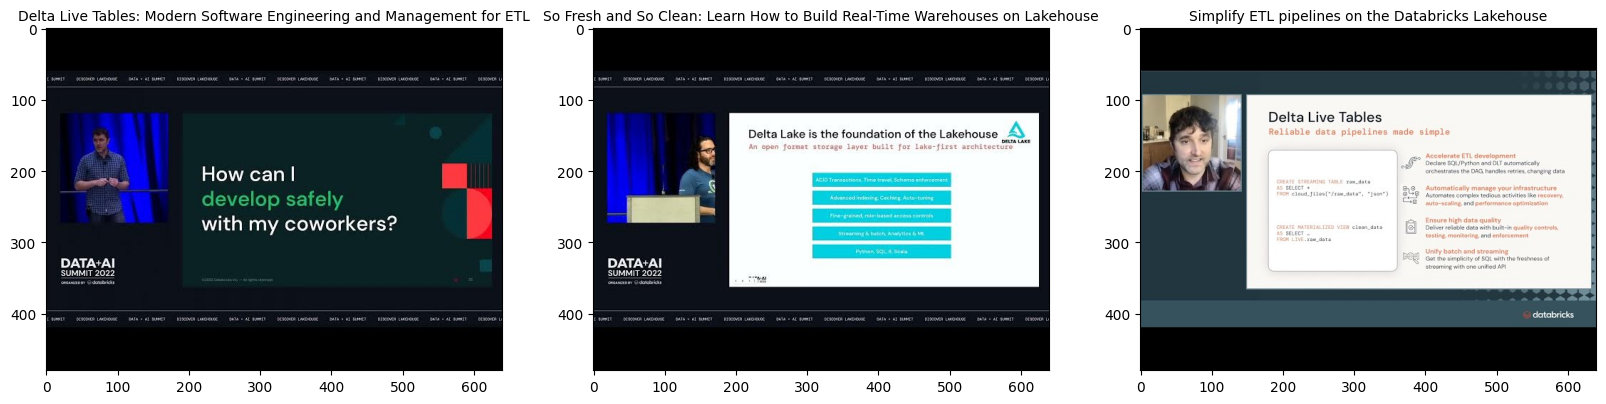

In [0]:
import urllib.request
from PIL import Image
from io import BytesIO
from matplotlib.pylab import plt
import matplotlib
font_size = 10
matplotlib.rc('font', size=font_size)
matplotlib.rc('axes', titlesize=font_size)
images_list= []
result = [(i.metadata["thumbnail_url"],i.metadata["title"]) for i in db.similarity_search("DLT best practices",k=3)]
url_list,title_list = zip(*result)
for url in url_list:
    with urllib.request.urlopen(url) as u:
        image_data = u.read()
    images_list.append(Image.open(BytesIO(image_data)))
#plot each image on the notebook
f, axarr = plt.subplots(1,3,figsize=(20, 20))
for i in range(len(url_list)):
  axarr[i].imshow(images_list[i]);
  axarr[i].set_title(title_list[i]);

Now package the required artifact (chroma embeddings) and the custom pyfunc and log the model for batch and realtime predictions

In [0]:
import cloudpickle
import langchain
import chromadb
import mlflow.pyfunc
import pandas as pd
import numpy as np
from langchain.vectorstores import Chroma
from sys import version_info

# save artifacts in this path as model artifacts
artifacts = {
  "chroma_path":'./.chroma/',
}

# Generate env info to save with the model
PYTHON_VERSION = "{major}.{minor}.{micro}".format(major=version_info.major,
  minor=version_info.minor,
  micro=version_info.micro)
conda_env = {
    'channels': ['defaults'],
    'dependencies': [
      'python={}'.format(PYTHON_VERSION),
      'pip',
      {
        'pip': [
          'mlflow',
          'cloudpickle=={}'.format(cloudpickle.__version__),
          'chromadb=={}'.format(chromadb.__version__),
          'langchain=={}'.format(langchain.__version__),
          'tiktoken==0.3.3'
        ],
      },
    ],
    'name': 'yt_search_rec_model'
}
 
# custom python function model for sim search
class VideoSemSearch(mlflow.pyfunc.PythonModel):
  def __init__(self):
    self.embed_db = None
  def load_context(self, context):
    self.embed_db = Chroma(persist_directory=context.artifacts["chroma_path"], embedding_function=HuggingFaceEmbeddings())
    return self.embed_db
  def predict(self, context, model_input:str):
    if self.embed_db is None:
          self.embed_db = self.load_context(context)
    query = model_input[0]
    res = self.embed_db.similarity_search(query)
    return json.dumps([res[i].dict() for i in range(len(res))])

In [0]:
with mlflow.start_run():
  mlflow.pyfunc.log_model(
    artifact_path="model",
    artifacts=artifacts,
    python_model=VideoSemSearch(),
    conda_env=conda_env)

Simple Batch Prediction

In [0]:
import pandas as pd
model = mlflow.pyfunc.load_model('runs:/573f8e3292174b9ea61865e2497b88cc/model')
res = model.predict(["delta live tables"])

In [0]:
res

'[{"page_content": "thank you very much i\'m super excited to be here to deep dive into delta live tables i\'m going to go through really quickly the introduction since i think a lot of you saw this this morning in the keynote but the basic idea is this all data starts off dirty you have to clean it up before you can actually do any of those cool things like ai machine learning or business intelligence but no pipeline is as simple as that bronze silver gold that i just showed you they\'re always way more complicated in practice and so the life of a data professional often ends up being something like this you get an email from your boss there\'s some super critical analysis that needs to be done so they can make decisions about how to move the business forward you unfortunately have only a giant directory filled with json data and it\'s your job to turn that into a beautiful interactive dashboard that drives insights to move the business so what do you do well i\'m a little bit biased 